In [3]:
%matplotlib inline
import pandas as pd
import dill
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)

In [4]:
dfs = []
for fl in glob.glob('/home/guso/Outputs/*.csv'):
    df = pd.read_csv(fl)
    dfs.append(df)
df = pd.concat(dfs)
df.columns = ['date', 'name', 'type', 'value']

In [5]:
df.head()

,date,name,type,value
0,2012-10-30,Optimal Auto-consumtion,Auto-consumption,370.418297
1,2012-10-30,Optimal Auto-consumption Guarnatee,Auto-consumption,499.988544
2,2012-10-30,Auto-consumption Battery,Auto-consumption,593.833488
3,2012-10-30,Social Cost Default,Total cost,5474.557944
4,2012-10-30,Social Cost Battery,Total cost,4796.747891


In [41]:
df.name.uniqueque()

array(['Optimal Auto-consumtion', 'Optimal Auto-consumption Guarnatee',
       'Auto-consumption Battery', 'Social Cost Default',
       'Social Cost Battery', 'firsttest-flexible-yes-none-combflex',
       'firsttest-flexible-yes-none-combflex_split',
       'firsttest-flexible-yes-none-combflex_vcg',
       'firsttest-flexible-yes-none-combflex-0.5-0.5',
       'firsttest-flexible-yes-none-combflex_split-0.5-0.5',
       'firsttest-flexible-yes-none-combflex_vcg-0.5-0.5',
       'firsttest-flexible-yes-ismarket-combflex',
       'firsttest-flexible-yes-ismarket-combflex_split',
       'firsttest-flexible-yes-ismarket-combflex_vcg',
       'firsttest-long-yes-ismarket-huang',
       'firsttest-short-none-none-muda',
       'firsttest-long-yes-ismarket-muda',
       'firsttest-short-none-ismarket-p2p'], dtype=object)

In [51]:
string = ''
for k in checkbox_dict:
    string += k + '.visible = false;\n'
print(string)

line0.visible = false;
line1.visible = false;
line2.visible = false;
line3.visible = false;
line4.visible = false;
line5.visible = false;
line6.visible = false;
line7.visible = false;
line8.visible = false;
line9.visible = false;
line10.visible = false;
line11.visible = false;
line12.visible = false;
line13.visible = false;
line14.visible = false;
line15.visible = false;
line16.visible = false;
line17.visible = false;



In [62]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.palettes import Category20
from bokeh.io import show
from bokeh.layouts import widgetbox
from bokeh.models.widgets import CheckboxGroup
from bokeh.models.widgets import Panel, Tabs


from bokeh.layouts import column, row
from bokeh.models import (Circle, ColumnDataSource, CrosshairTool, CustomJS,
                          Grid, HoverTool, Legend, LegendItem, Line,
                          LinearAxis, Plot, Range1d, TapTool, WheelZoomTool,)
output_file("toolbar.html")

#source = ColumnDataSource(data=dict(
#    x=[1, 2, 3, 4, 5],
#    y=[2, 5, 8, 2, 7],
#    desc=['A', 'b', 'C', 'd', 'E'],
#))



TOOLTIPS = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("desc", "@name"),
]


tabs = []
for tt in df.type.unique():
    p = figure(plot_width=1500, plot_height=800, tooltips=TOOLTIPS,
               title="Mouse over the dots", x_axis_type="datetime")
    sources = []
    legend_items = []
    for i, name in enumerate(df.name.unique()):

        tmp = df[df.type == tt].copy()
        tmp['DATE'] = pd.to_datetime(tmp['date'], format='%Y/%m/%d')
        tmp = tmp[tmp.name == name]
        tmp = tmp.sort_values('DATE')
        source = ColumnDataSource(tmp)

        #checkbox_labels.append(name)
        x = p.line('DATE', 'value', source=source, color=Category20[20][i], line_width=LW)
        #checkbox_dict['line{0}'.format(i)] = x
        li = LegendItem(label=name, renderers=[x])
        legend_items.append(li)
        sources.append(source)

    legends = lambda: legend_items

    #legends = lambda: [
    #    LegendItem(label="CR1", renderers=[cr1]),
    #    LegendItem(label="CR2", renderers=[cr2, ln2]),
    #    LegendItem(label="CR3", renderers=[cr3]),
    #]
    legend = lambda **kwargs: Legend(background_fill_alpha=0.7, items=legends(), click_policy="hide", **kwargs)
    p.add_layout(legend(location="center", orientation="vertical", name="right"), 'right')
    tab_ = Panel(child=p, title=tt)
    tabs.append(tab_)
    
tabs = Tabs(tabs=tabs)

show(tabs)

In [31]:
df[(df.date=='2012-08-22') & (df.type=='Max Inc Cost')]

,date,name,type,value
6,2012-08-22,firsttestflexible-yes-none-combflex,Max Inc Cost,63.8643
10,2012-08-22,firsttestflexible-yes-none-combflex_split,Max Inc Cost,58.8940
14,2012-08-22,firsttestflexible-yes-none-combflex_vcg,Max Inc Cost,1983.3047
18,2012-08-22,firsttestflexible-yes-none-combflex-0.5-0.5,Max Inc Cost,55.2616
22,2012-08-22,firsttestflexible-yes-none-combflex_split-0.5-0.5,Max Inc Cost,54.0793
26,2012-08-22,firsttestflexible-yes-none-combflex_vcg-0.5-0.5,Max Inc Cost,1688.8318
30,2012-08-22,firsttestflexible-yes-ismarket-combflex,Max Inc Cost,491.2097
34,2012-08-22,firsttestflexible-yes-ismarket-combflex_split,Max Inc Cost,72.3199
38,2012-08-22,firsttestflexible-yes-ismarket-combflex_vcg,Max Inc Cost,2125.9876
42,2012-08-22,firsttestlong-yes-ismarket-huang,Max Inc Cost,6.8769


In [3]:
with open('/home/guso/Outputs/firsttestflexible-yes-none-combflex2012-08-22.pkl', 'rb') as fh: sim = dill.load(fh)

In [4]:
sim.results[0][3]

defaultdict(<function lemsim.wdp.<lambda>()>,
            {'0': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                    0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                    0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
             '1': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                    0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                    0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
             '10': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                    0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                    0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
             '11': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                    0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [61]:
from lemsim.simulation_runner import cost_given_prices

for i, b in enumerate(sim.brokers):
    p = b.prosumer
    reg = p.register[0]
    pb = reg.get('price_buy')
    ps = reg.get('price_sell')
    pbat = reg.get('profile_only_battery')
    cost = round(cost_given_prices(pbat, pb, ps), 4)
    cost_market = round(reg.get('final_cost'), 4)
    rel_change = round((cost_market - cost) / np.abs(cost) * 100, 4)
    ic = np.array([x / p.eff_c if x > 0 else x * p.eff_d for x in reg['initial_course'][0][2]])
    ic += reg['load'][0]
    if rel_change > 0:
        print(i, rel_change)
        break

4 32.1811


In [84]:
p.add_commitment(5, 0.3)

In [85]:
p.commitments

{5: 0.3}

In [83]:
for k, v in sim.results[0][3].items():
    for i in range(T):
        print(k, i, v[i])

0 0 0.0
0 1 0.0
0 2 0.0
0 3 0.0
0 4 0.0
0 5 0.0
0 6 0.0
0 7 0.0
0 8 0.0
0 9 0.0
0 10 0.0
0 11 0.0
0 12 0.0
0 13 0.0
0 14 0.0
0 15 0.0
0 16 0.0
0 17 0.0
0 18 0.0
0 19 0.0
0 20 0.0
0 21 0.0
0 22 0.0
0 23 0.0
0 24 0.0
0 25 0.0
0 26 0.0
0 27 0.0
0 28 0.0
0 29 0.0
0 30 0.0
0 31 0.0
0 32 0.0
0 33 0.0
0 34 0.0
0 35 0.0
0 36 0.0
0 37 0.0
0 38 0.0
0 39 0.0
0 40 0.0
0 41 0.0
0 42 0.0
0 43 0.0
0 44 0.0
0 45 0.0
0 46 0.0
0 47 0.0
1 0 0.0
1 1 0.0
1 2 0.0
1 3 0.0
1 4 0.0
1 5 0.0
1 6 0.0
1 7 0.0
1 8 0.0
1 9 0.0
1 10 0.0
1 11 0.0
1 12 0.0
1 13 0.0
1 14 0.0
1 15 0.0
1 16 0.0
1 17 0.0
1 18 0.0
1 19 0.0
1 20 0.0
1 21 0.0
1 22 0.0
1 23 0.0
1 24 0.0
1 25 0.0
1 26 0.0
1 27 0.0
1 28 0.0
1 29 0.0
1 30 0.0
1 31 0.0
1 32 0.0
1 33 0.0
1 34 0.0
1 35 0.0
1 36 0.0
1 37 0.0
1 38 0.0
1 39 0.0
1 40 0.0
1 41 0.0
1 42 0.0
1 43 0.0
1 44 0.0
1 45 0.0
1 46 0.0
1 47 0.0
10 0 0.0
10 1 0.0
10 2 0.0
10 3 0.0
10 4 0.0
10 5 0.0
10 6 0.0
10 7 0.0
10 8 0.0
10 9 0.0
10 10 0.0
10 11 0.0
10 12 0.0
10 13 0.0
10 14 0.0
10 15 0.0
10 16 

25 43 0.0
25 44 0.0
25 45 0.0
25 46 0.0
25 47 0.0
26 0 0.0
26 1 0.0
26 2 0.0
26 3 0.0
26 4 0.0
26 5 0.0
26 6 0.0
26 7 0.0
26 8 0.0
26 9 0.0
26 10 0.0
26 11 0.0
26 12 0.0
26 13 0.0
26 14 0.0
26 15 0.0
26 16 0.0
26 17 0.0
26 18 0.0
26 19 0.0
26 20 0.0
26 21 0.0
26 22 0.0
26 23 0.0
26 24 0.0
26 25 0.0
26 26 0.0
26 27 0.0
26 28 0.0
26 29 0.0
26 30 0.0
26 31 0.0
26 32 0.0
26 33 0.0
26 34 0.0
26 35 0.0
26 36 0.0
26 37 0.0
26 38 0.0
26 39 0.0
26 40 0.0
26 41 0.0
26 42 0.0
26 43 0.0
26 44 0.0
26 45 0.0
26 46 0.0
26 47 0.0
27 0 0.0
27 1 0.0
27 2 0.0
27 3 0.0
27 4 0.0
27 5 0.0
27 6 0.0
27 7 0.0
27 8 0.0
27 9 0.0
27 10 0.0
27 11 0.0
27 12 0.0
27 13 0.0
27 14 0.0
27 15 0.0
27 16 0.0
27 17 0.0
27 18 0.0
27 19 0.0
27 20 0.0
27 21 0.0
27 22 0.0
27 23 0.0
27 24 0.0
27 25 0.0
27 26 0.0
27 27 0.0
27 28 0.0
27 29 0.0
27 30 0.0
27 31 0.0
27 32 0.0
27 33 0.0
27 34 0.0
27 35 0.0
27 36 0.0
27 37 0.0
27 38 0.0
27 39 0.0
27 40 0.0
27 41 0.0
27 42 0.0
27 43 0.0
27 44 0.0
27 45 0.0
27 46 0.0
27 47 0.0
28 0 0.0
2

5 17 0.2018
5 18 1.0854
5 19 0.5731
5 20 0.0
5 21 0.0
5 22 0.0
5 23 0.0
5 24 0.0
5 25 0.0
5 26 0.0
5 27 0.0
5 28 0.0
5 29 0.0
5 30 0.3575
5 31 0.035
5 32 0.067
5 33 0.0
5 34 0.0
5 35 0.0
5 36 0.0
5 37 0.0
5 38 0.0
5 39 0.0
5 40 0.0
5 41 0.0
5 42 0.0
5 43 0.0
5 44 0.0
5 45 0.0
5 46 0.0
5 47 0.0
6 0 0.0
6 1 0.0
6 2 0.0
6 3 0.0
6 4 0.0
6 5 0.0
6 6 0.0
6 7 0.0
6 8 0.0
6 9 0.0
6 10 0.0
6 11 0.0
6 12 0.0
6 13 0.0
6 14 0.0
6 15 0.0
6 16 1.0722
6 17 1.0175
6 18 0.9735
6 19 0.0
6 20 0.0
6 21 0.0
6 22 0.0
6 23 0.0
6 24 0.0
6 25 0.0
6 26 0.0
6 27 0.0
6 28 0.0
6 29 0.0
6 30 0.0
6 31 0.0
6 32 0.0
6 33 0.0
6 34 0.0
6 35 0.0
6 36 0.0
6 37 0.0
6 38 0.0
6 39 0.0
6 40 0.0
6 41 0.0
6 42 0.0
6 43 0.0
6 44 0.0
6 45 0.0
6 46 0.0
6 47 0.0
7 0 0.0
7 1 0.0
7 2 0.0
7 3 0.0
7 4 0.0
7 5 0.0
7 6 0.0
7 7 0.0
7 8 0.0
7 9 0.0
7 10 0.0
7 11 0.0
7 12 0.0
7 13 0.0
7 14 0.0
7 15 0.0514
7 16 0.0
7 17 1.3458
7 18 2.7325
7 19 0.9321
7 20 0.0
7 21 0.0
7 22 0.0
7 23 0.0
7 24 0.0
7 25 0.0
7 26 0.0
7 27 0.0
7 28 0.0
7 29 0.0
7 

In [78]:
(0.1906 + 0.4349 + 0.2253 + 0.3722)

1.2229999999999999

defaultdict(<function lemsim.wdp.<lambda>()>,
            {'0': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                    0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                    0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
             '1': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                    0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                    0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
             '10': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                    0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                    0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
             '11': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                    0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [66]:
cost, cost_market

(49.4918, 65.4188)

In [67]:
p.extra_cost

15.926999999999994

In [64]:
cost_given_prices(ic, pb, ps)

45.80852359018678

In [60]:
reg['profile_only_battery']

array([ 4.00000000e-02,  5.80000000e-02,  4.90000000e-02,  7.20000000e-02,
        1.10000000e-01,  5.70000000e-02,  4.80000000e-02,  4.90000000e-02,
        1.18000000e-01,  4.90000000e-02,  4.90000000e-02,  5.80000000e-02,
        1.79000000e-01,  1.18700000e+00,  1.15100000e+00,  1.04267811e+00,
        1.01724324e+00,  2.25251036e-01, -1.73472348e-18,  3.72291877e-01,
       -1.73472348e-18, -4.04784884e-01, -1.30024401e+00, -8.64379884e-01,
       -7.85461351e-01,  6.66133815e-16,  3.33066907e-16, -5.55111512e-16,
        1.11022302e-16, -2.77555756e-16, -3.33066907e-16, -3.12250226e-16,
       -6.93889390e-17, -2.08166817e-17, -1.73472348e-18, -5.55111512e-17,
       -1.11022302e-16,  0.00000000e+00, -2.77555756e-17,  0.00000000e+00,
       -2.77555756e-17, -2.77555756e-17, -8.32667268e-17,  1.11022302e-16,
        0.00000000e+00,  2.22044605e-16, -5.55111512e-16, -5.55111512e-17])

In [ ]:
reg

In [1]:
# %load simulations/src/run_par.py
import numpy as np
import dill
import pandas as pd
import os,sys,inspect
import copyreg
import types
import multiprocessing
import datetime


def _pickle_method(m):
    if m.im_self is None:
        return getattr, (m.im_class, m.im_func.func_name)
    else:
        return getattr, (m.im_self, m.im_func.func_name)

copyreg.pickle(types.MethodType, _pickle_method)

from concurrent.futures import ProcessPoolExecutor

#currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
#parentdir = os.path.dirname(currentdir)
#parentdir = os.path.dirname(parentdir)
#sys.path.insert(0,parentdir)
parentdir = '/home/guso/Projects/loquisimo/code'

from os.path import expanduser
home = expanduser('~')

from lemsim.sim_manager import run_one_day

#####################################

#os.environ["CPLEXPATH"] = '/home/infres/dkiedanski/Cplex/cplex/bin/x86-64_linux/cplex'
#print(parentdir)

NICK = 'test2-'

INTERVAL = 3
CANT = 10
FIRSTDAY = datetime.date(2012, 8, 1)
TIMEDELTA = datetime.timedelta(days=INTERVAL)

T = 48
p_1 = np.ones(T) * 16.0
p_1[: T // 2] = 12.0
p_2 = np.ones(T) * 14
ps = np.ones(T) * 10.0

PARAMS = {
    'N': 50,
    'b_min': 0,
    'b_max': 13,
    'eff_c': 0.95,
    'eff_d': 0.95,
    'd_max': 5,
    'd_min': -5,
    'seed': 420,
    'PRICES_BUY': [p_1, p_2],
    'PRICES_SELL': [ps],
    'T': 48,
    'PATHTODATA': '{0}/simulations/data/customers_data.csv'.format(parentdir),
    'DAYS': 1,
    'savepath': '{0}/Outputs/combflex/'.format(home),
}

###################################################


#DATES = [str(FIRSTDAY + (TIMEDELTA * x)) for x in range(1, CANT)]
DATES = ['2012-08-22']

def fun(args):
    return run_one_day(args[0], args[1], onoff=[1] + [0] * 50, nick=args[2])

arguments = ((day, PARAMS, NICK) for day in DATES)
with ProcessPoolExecutor() as executor:
    for result in executor.map(fun, arguments):   # (*p) does the unpacking part
        pass


test2-flexible-yes-none-combflex 144.95807600021362
Global metrics elapsed time: 46.7900025844574
191.76333260536194


In [4]:
df2 = pd.read_csv('/home/guso/Outputs/combflex/test2-2012-08-22_50-420-13-1.csv')
df2.columns = ['date', 'name', 'type', 'value']

In [5]:
df2

,date,name,type,value
0,2012-08-22,Optimal Auto-consumtion,Auto-consumption,483.993236
1,2012-08-22,Optimal Auto-consumption Guarnatee,Auto-consumption,592.659730
2,2012-08-22,Auto-consumption Battery,Auto-consumption,694.992808
3,2012-08-22,Social Cost Default,Total cost,7630.863925
4,2012-08-22,Social Cost Battery,Total cost,6797.257337
5,2012-08-22,test2-flexible-yes-none-combflex,Auto-consumption,660.095743
6,2012-08-22,test2-flexible-yes-none-combflex,Total cost,6771.131091
7,2012-08-22,test2-flexible-yes-none-combflex,Max Inc Cost,0.000000
8,2012-08-22,test2-flexible-yes-none-combflex,Max Dec Cost,-9.390700


In [4]:
from os.path import expanduser
home = expanduser('~')

In [5]:
home

'/home/guso'

In [12]:
cons = np.vstack([b.prosumer.register[0]['profile_only_battery'] for b in sim.brokers]).sum(axis=0)
cons = np.abs(cons).sum()

In [14]:
cons

694.9928083873162

In [4]:
with open('/home/guso/Outputs/combflextest2-flexible-yes-none-combflex2012-08-22.pkl', 'rb') as fh: sim = dill.load(fh)

In [16]:
from lemsim.simulation_runner import cost_given_prices

for i, b in enumerate(sim.brokers):
    p = b.prosumer
    reg = p.register[0]
    pb = reg.get('price_buy')
    ps = reg.get('price_sell')
    pbat = reg.get('profile_only_battery')
    nd = reg.get('net_demand')
    ll = reg.get('load')
    cost = cost_given_prices(pbat, pb, ps)
    cost_market = reg.get('final_cost')
    rel_change = round((cost_market - cost) / np.abs(cost) * 100, 6)
    ic = np.array([x / p.eff_c if x > 0 else x * p.eff_d for x in reg['initial_course'][0][2]])
    ic += reg['load']
    if rel_change > 0:
        print(i, rel_change)
        break

9 4.921495


In [17]:
bid = sim.results[0][0][9].sellingbundles[0]

In [46]:
bid.__dict__

{'start': 16,
 'end': 29,
 'quantities': array([0.2914, 0.4246, 0.6518, 0.1752, 0.7635, 0.2553, 1.0111, 1.3082,
        0.8274, 1.4088, 0.6694, 0.5036, 0.5549, 0.3778]),
 'unitcost': 10.0,
 'keep': 9.076900000000002,
 'keep_quantities': array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]),
 'type': 'sellingbundle',
 'threshold': 2}

In [47]:
import itertools

In [53]:
[x for x in itertools.combinations([1, 2, 3],3)]

[(1, 2, 3)]

In [18]:
bid.start, bid.end, bid.quantities, bid.keep, bid.keep_quantities

(16, 29, array([0.2914, 0.4246, 0.6518, 0.1752, 0.7635, 0.2553, 1.0111, 1.3082,
        0.8274, 1.4088, 0.6694, 0.5036, 0.5549, 0.3778]), 9.076900000000002, array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]))

In [33]:
bid.quantities.sum() - bid.keep

0.1460999999999988

In [31]:
sim.results[0][4]['9'].sum()

3.7373000000000003

In [44]:
cons = [x for x in sim.results[0][1].constraints 
 if 'sellingbundle' in x._LpAffineExpression__name and '9' == x._LpAffineExpression__name.split('_')[-1]]

In [45]:
for c in cons:
    print(c)
    print('\n' * 3)

x_sellingbundle_16_16_9 + x_sellingbundle_17_16_9 + x_sellingbundle_18_16_9 + x_sellingbundle_19_16_9 + x_sellingbundle_20_16_9 + x_sellingbundle_21_16_9 + x_sellingbundle_22_16_9 + x_sellingbundle_23_16_9 + x_sellingbundle_24_16_9 + x_sellingbundle_25_16_9 + x_sellingbundle_26_16_9 + x_sellingbundle_27_16_9 + x_sellingbundle_28_16_9 + x_sellingbundle_29_16_9 <= 4.854699999999999




x_sellingbundle_16_16_9 + x_sellingbundle_17_16_9 + x_sellingbundle_18_16_9 + x_sellingbundle_19_16_9 + x_sellingbundle_20_16_9 + x_sellingbundle_21_16_9 + x_sellingbundle_22_16_9 + x_sellingbundle_23_16_9 + x_sellingbundle_24_16_9 + x_sellingbundle_25_16_9 + x_sellingbundle_26_16_9 + x_sellingbundle_27_16_9 + x_sellingbundle_28_16_9 + x_sellingbundle_29_16_9 <= 4.721499999999999




x_sellingbundle_16_16_9 + x_sellingbundle_17_16_9 + x_sellingbundle_18_16_9 + x_sellingbundle_19_16_9 + x_sellingbundle_20_16_9 + x_sellingbundle_21_16_9 + x_sellingbundle_22_16_9 + x_sellingbundle_23_16_9 + x_sellingbundle_24

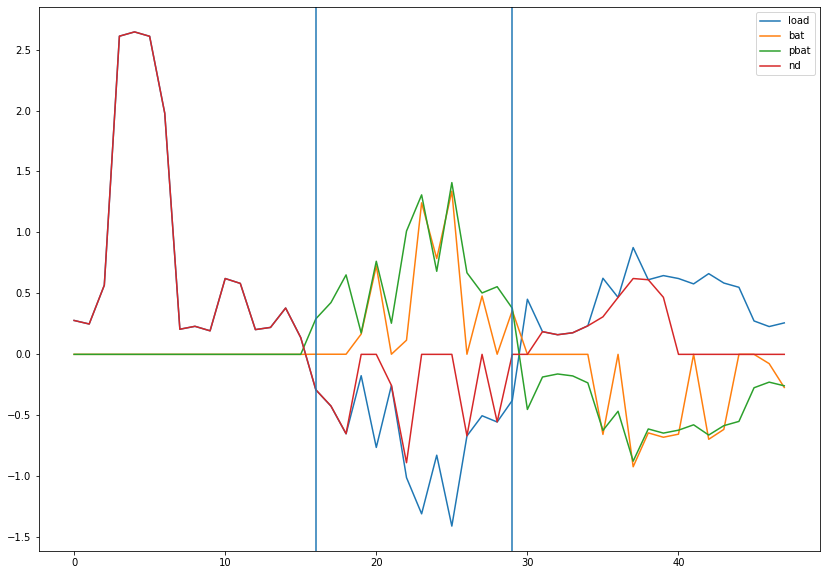

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14, 10))
ax.plot(ll, label='load')
ax.plot(reg['initial_course'][0][2], label='bat')
ax.plot(pbat - ll, label='pbat')
ax.plot(nd, label='nd')
ax.legend()
ax.axvline(16)
ax.axvline(29)

In [10]:
cost

190.48382633080402

In [11]:
cost_market

199.8584773835102

In [13]:
p.extra_cost

-35.4508

In [20]:
cost_given_prices(ic, pb, ps)

199.92838318917757

In [14]:
comm = reg['commitments']

In [18]:
comm

{0: None,
 1: None,
 2: None,
 3: None,
 4: None,
 5: None,
 6: None,
 7: None,
 8: None,
 9: None,
 10: None,
 11: None,
 12: None,
 13: None,
 14: None,
 15: 0.1373,
 16: -0.2914,
 17: -0.4246,
 18: -0.6518,
 19: None,
 20: None,
 21: -0.2553,
 22: -0.8898999999999999,
 23: None,
 24: None,
 25: None,
 26: -0.6694,
 27: None,
 28: -0.5549,
 29: None,
 30: None,
 31: None,
 32: None,
 33: None,
 34: None,
 35: None,
 36: None,
 37: None,
 38: None,
 39: None,
 40: None,
 41: None,
 42: None,
 43: None,
 44: None,
 45: None,
 46: None,
 47: None}

In [19]:
(
    comm[15] * 14 +
    comm[16] * 10 +
    comm[17] * 10 +
    comm[18] * 10 +
    comm[21] * 10 +
    comm[22] * 10 +
    comm[26] * 10 +
    comm[28] * 10
)

-35.4508

In [14]:
reg['initial_course'][33]

('optimal',
 91.77600000000002,
 array([-0.56210526,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -1.98315789,  0.        ,  0.        ,  0.        ,
        -0.3       , -2.61157895, -2.60842105, -2.49263158, -2.44210526]))

In [15]:
-0.562*0.95

-0.5339

In [8]:
sum(reg['commitments'][k] for k in range(0, 24) if reg['commitments'][k] is not None) * 12

-28.5084

In [9]:
sum(reg['commitments'][k] for k in range(24, 48) if reg['commitments'][k] is not None) * 16

-19.5888

In [45]:
p.extra_cost / sum(x for x in reg['commitments'].values() if x is not None)

12.818928054080157

In [51]:
p.extra_cost

26.548000000000002

In [19]:
price = p.extra_cost
D = reg['net_demand']
#pb = self.register[day]['price_buy']
#ps = self.register[day]['price_sell']
comm = reg['commitments']
#print(self.owner_id, comm)
#sp = self.register[day]['special_price']

for t in range(p.T):
    p_ = pb[t] if D[t] >= 0 else ps[t]
    if t in comm and comm[t] is not None:
        print(t, comm[t], p_)
        if np.abs(D[t]) > np.abs(comm[t]):
            price += (D[t] - comm[t]) * p_
    #if t in sp:
    #    q1, p1 = sp[t]
    #    if np.abs(D[t]) > np.abs(q1):
    #        #price += q1 * p1 + (D[t] - q1) * p_
    #        price += p1 + (D[t] - q1) * p_
    #    else:
    #        # price += D[t] * p1
    #        price += p1
    else:
        price += D[t] * p_
print(price)

19 0.969 12.0
20 0.367 12.0
23 0.044 12.0
33 0.534 16.0
34 0.157 16.0
468.4799889196676


In [61]:
reg['initial_course']

{0: ('optimal',
  461.0039889196677,
  array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  1.22171579,  5.        ,  5.        , -0.18631579,
          0.3952    ,  0.31255   ,  0.1843    ,  0.45885   ,  0.399     ,
          0.1786    ,  0.0361    ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        , -1.98315789,
          0.        ,  0.        , -0.17684211, -0.68526316, -2.61157895,
         -2.60842105, -2.49263158, -2.44210526])),
 1: ('optimal',
  435.5759889196676,
  array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        , 

In [62]:
for t in range(48):
    if comm[t] is not None:
        print(t, D[t], comm[t])

19 0.969 0.969
20 0.3670000000000001 0.367
23 5.307157894736842 0.044
33 0.0 0.534
34 0.45299999999999996 0.157


In [57]:
comm

{0: None,
 1: None,
 2: None,
 3: None,
 4: None,
 5: None,
 6: None,
 7: None,
 8: None,
 9: None,
 10: None,
 11: None,
 12: None,
 13: None,
 14: None,
 15: None,
 16: None,
 17: None,
 18: None,
 19: 0.969,
 20: 0.367,
 21: None,
 22: None,
 23: 0.044,
 24: None,
 25: None,
 26: None,
 27: None,
 28: None,
 29: None,
 30: None,
 31: None,
 32: None,
 33: 0.534,
 34: 0.157,
 35: None,
 36: None,
 37: None,
 38: None,
 39: None,
 40: None,
 41: None,
 42: None,
 43: None,
 44: None,
 45: None,
 46: None,
 47: None}

In [54]:
price

468.4799889196676

In [42]:
cost_given_prices(reg['net_demand'], pb, ps)

461.00398891966756

In [41]:
for i, x in enumerate(reg['net_demand']):
    print(i, x)

0 2.119
1 0.287
2 0.264
3 0.234
4 0.21
5 0.227
6 0.217
7 0.56
8 0.94
9 0.61
10 0.79
11 0.7909999999999999
12 0.789
13 0.46
14 0.507
15 0.991
16 2.318
17 2.0940000000000003
18 3.985016620498616
19 0.969
20 0.3670000000000001
21 5.030157894736842
22 5.273559366969494e-16
23 5.307157894736842
24 0.0
25 1.2212453270876722e-15
26 2.220446049250313e-16
27 2.7755575615628914e-16
28 -1.1102230246251565e-16
29 -5.551115123125783e-17
30 -2.7755575615628914e-17
31 1.214306433183765e-15
32 0.5269999999999999
33 0.0
34 0.45299999999999996
35 0.504
36 0.499
37 0.505
38 0.679
39 1.834000000000001
40 0.6109999999999997
41 0.6509999999999991
42 -1.1102230246251565e-16
43 1.2212453270876722e-15
44 -8.881784197001252e-16
45 0.0
46 -8.881784197001252e-16
47 0.0


2.0709999999999997

In [28]:
pb

array([12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12.,
       12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 16., 16.,
       16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16.,
       16., 16., 16., 16., 16., 16., 16., 16., 16.])

In [12]:
cost

461.00398891966756

In [13]:
cost_market

468.4799889196676

In [21]:
sim.results[0][3]

defaultdict(<function lemsim.wdp.<lambda>()>,
            {'0': array([ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
                     0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
                     0.    , -0.0226, -0.9099, -0.9368, -0.534 , -0.4519, -0.4601,
                     0.    , -0.0369, -0.6697,  0.    , -0.6797,  0.    , -0.104 ,
                    -0.1221, -0.049 ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
                     0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
                     0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ]),
             '1': array([ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
                     0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
                     0.    , -0.7052, -0.7461, -0.4402, -0.8673, -0.5614,  0.    ,
                     0.    , -0.3649,  0.    , -0.026 ,  0.    ,  0.    ,  0.    ,
                     0.    ,  0.    , 

In [27]:
sim.results[0][4]

defaultdict(<function lemsim.wdp.<lambda>()>,
            {'0': array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
                    0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0226,
                    0.9099, 0.9368, 0.534 , 0.4519, 0.4601, 0.    , 0.0369, 0.6697,
                    0.    , 0.6797, 0.    , 0.104 , 0.1221, 0.049 , 0.    , 0.    ,
                    0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
                    0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ]),
             '1': array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
                    0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.7052,
                    0.7461, 0.4402, 0.8673, 0.5614, 0.    , 0.    , 0.3649, 0.    ,
                    0.026 , 0.    , 0.    , 0.    , 0.    , 0.    , 0.122 , 0.122 ,
                    0.134 , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
                  

In [19]:
x for x in reg['initial_course'][0][2]

SyntaxError: invalid syntax (<ipython-input-19-a898bbc514ce>, line 1)